# Importation des librairies et du Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("resulats.paysolympiques - results-20221213-121934.csv")
df.head()

,Country_orga,Season,countryName,Nbre_de_Medaille,Year
0,Greece,Summer,Greece,36,1896
1,Greece,Summer,Hungary,6,1896
2,Greece,Summer,Greece,2,1896
3,Greece,Summer,Great Britain,6,1896
4,Greece,Summer,Great Britain,3,1896


In [21]:
df_japon = pd.read_csv("Tokyo_2021_dataset_1.csv")
df_japon.head()

,Rank,Team/NOC,Gold Medal,Silver Medal,Bronze Medal,Total,Rank by Total,NOCCode
0,1,United States of America,39,41,33,113,1,USA
1,2,People's Republic of China,38,32,18,88,2,CHN
2,3,Japan,27,14,17,58,5,JPN
3,4,Great Britain,22,21,22,65,4,GBR
4,5,ROC,20,28,23,71,3,ROC


In [22]:
df_japon.loc[4,"Team/NOC"] = "Russian Olympic Committee"
df_japon.head()

,Rank,Team/NOC,Gold Medal,Silver Medal,Bronze Medal,Total,Rank by Total,NOCCode
0,1,United States of America,39,41,33,113,1,USA
1,2,People's Republic of China,38,32,18,88,2,CHN
2,3,Japan,27,14,17,58,5,JPN
3,4,Great Britain,22,21,22,65,4,GBR
4,5,Russian Olympic Committee,20,28,23,71,3,ROC


In [23]:
for index, row in df_japon.iterrows():
    df.loc[len(df)] = ["Japan", "Summer", row['Team/NOC'], row['Total'], 2020]
df

,Country_orga,Season,countryName,Nbre_de_Medaille,Year
0,Greece,Summer,Greece,36,1896
1,Greece,Summer,Hungary,6,1896
2,Greece,Summer,Greece,2,1896
3,Greece,Summer,Great Britain,6,1896
4,Greece,Summer,Great Britain,3,1896
...,...,...,...,...,...
4311,Japan,Summer,Ghana,1,2020
4312,Japan,Summer,Grenada,1,2020
4313,Japan,Summer,Kuwait,1,2020
4314,Japan,Summer,Republic of Moldova,1,2020


In [ ]:
df.to_csv('resulats.paysolympiques.csv')

# Est-ce qu'un pays qui héberge les JO est **meillieur** qu'habituellement ?

### Pour répondre a cette question il suffit de voir combien en moyenne un pays gagne de médaille lorsqu'il est organisateur et lorsqu'il ne l'est pas

In [3]:
df_exterieur = df.loc[df["countryName"] != df["Country_orga"]] 
df_exterieur = df_exterieur.loc[df_exterieur["countryName"].isin(list(df["Country_orga"].unique()))]
df_exterieur = df_exterieur.groupby("countryName")["Nbre_de_Medaille"].mean().to_frame()
df_exterieur.reset_index(inplace=True)
df_exterieur.rename(columns = {'Nbre_de_Medaille':'Nbre_de_Medaille_Exterieur'}, inplace = True)
df_exterieur

,countryName,Nbre_de_Medaille_Exterieur
0,Australia,9.469027
1,Austria,4.681319
2,Belgium,4.827586
3,Canada,8.275168
4,China,12.983871
5,Finland,6.825397
6,France,8.595092
7,Germany,12.893333
8,Greece,3.083333
9,Italy,8.865497


In [4]:
df_domicile = df.loc[df["countryName"] == df["Country_orga"]]
df_domicile = df_domicile.loc[df_domicile["countryName"].isin(list(df["Country_orga"].unique()))]
df_domicile = df_domicile.groupby("countryName")["Nbre_de_Medaille"].mean().to_frame()
df_domicile.rename(columns = {'Nbre_de_Medaille':'Nbre_de_Medaille_Domicile'}, inplace = True)
df_domicile.reset_index(inplace=True)
df_domicile

,countryName,Nbre_de_Medaille_Domicile
0,Australia,12.500000
1,Austria,4.800000
2,Belgium,20.888889
3,Canada,10.818182
4,China,20.444444
5,Finland,6.666667
6,France,14.461538
7,Germany,19.250000
8,Greece,12.928571
9,Italy,10.083333


In [5]:
df_medaile_pays = df_exterieur.merge(df_domicile, on="countryName")
df_medaile_pays

,countryName,Nbre_de_Medaille_Exterieur,Nbre_de_Medaille_Domicile
0,Australia,9.469027,12.500000
1,Austria,4.681319,4.800000
2,Belgium,4.827586,20.888889
3,Canada,8.275168,10.818182
4,China,12.983871,20.444444
5,Finland,6.825397,6.666667
6,France,8.595092,14.461538
7,Germany,12.893333,19.250000
8,Greece,3.083333,12.928571
9,Italy,8.865497,10.083333


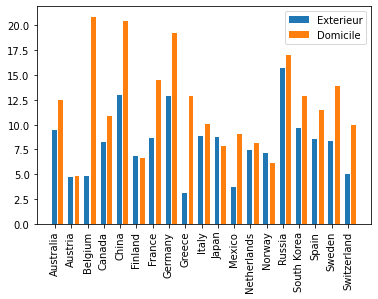

In [6]:
X_axis = np.arange(len(df_medaile_pays["countryName"]))
plt.bar(X_axis - 0.2, df_medaile_pays["Nbre_de_Medaille_Exterieur"], align='edge', width=0.3, label = 'Exterieur')
plt.bar(X_axis + 0.2, df_medaile_pays["Nbre_de_Medaille_Domicile"], align='edge', width=0.3, label = 'Domicile')
plt.xticks(X_axis, df_medaile_pays["countryName"],rotation="vertical")
plt.legend(loc='upper right')
plt.show()

### On peut clairement que les pays qui ont dèja organisé les JO gagnent en moyenne plus de médaille lorsqu'ils sont organisateur. Par conséquent un pays est effectivement meillieur lorsqu'il héberge les JO

# Combien de **médailles** vont etre remportées par la France lors des prochains JO ?

### Pour sa nous utilisons un modèles de régression assez connu et simple à implémenter la régression linéaire avec comme variable dépendante le nombre de médailles remportées et en variable indépendante le pays qui héberge les JO

In [7]:
df_pred = df.loc[df["countryName"] == "France"][["Country_orga", "Nbre_de_Medaille"]]
df_pred

,Country_orga,Nbre_de_Medaille
7,Greece,10
10,Greece,1
22,France,24
29,France,15
32,France,67
...,...,...
4064,Brasil,20
4101,Brasil,3
4138,Brasil,15
4139,Brasil,16


#### On encode notre variable catégorique "Country_orga" pour la rendre utilisable par notre modèle de régression

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
X = pd.DataFrame(encoder.fit_transform(df_pred[["Country_orga"]]).toarray())
X

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
185,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### On récupére notre variable dépendante 

In [9]:
y = df_pred["Nbre_de_Medaille"]
y

7       10
10       1
22      24
29      15
32      67
        ..
4064    20
4101     3
4138    15
4139    16
4150     6
Name: Nbre_de_Medaille, Length: 189, dtype: int64

#### On applique la régression linéaire

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Les JO 2024 se déroulant en France on récupère l'encodage de l'attribut France

In [11]:
org_country_2024 = np.array(X.iloc[2]).reshape(1, -1)

#### On prédit le nombre de médaille que remportera la France lors des JO 2024

In [12]:
y_pred = regressor.predict(org_country_2024)
int(y_pred[0])

18

La France remportera donc 18 médailles selon notre modèle